<a href="https://colab.research.google.com/github/Y326s/ECE6397HW/blob/main/YaweiSu_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Neural Networks Assignment

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)


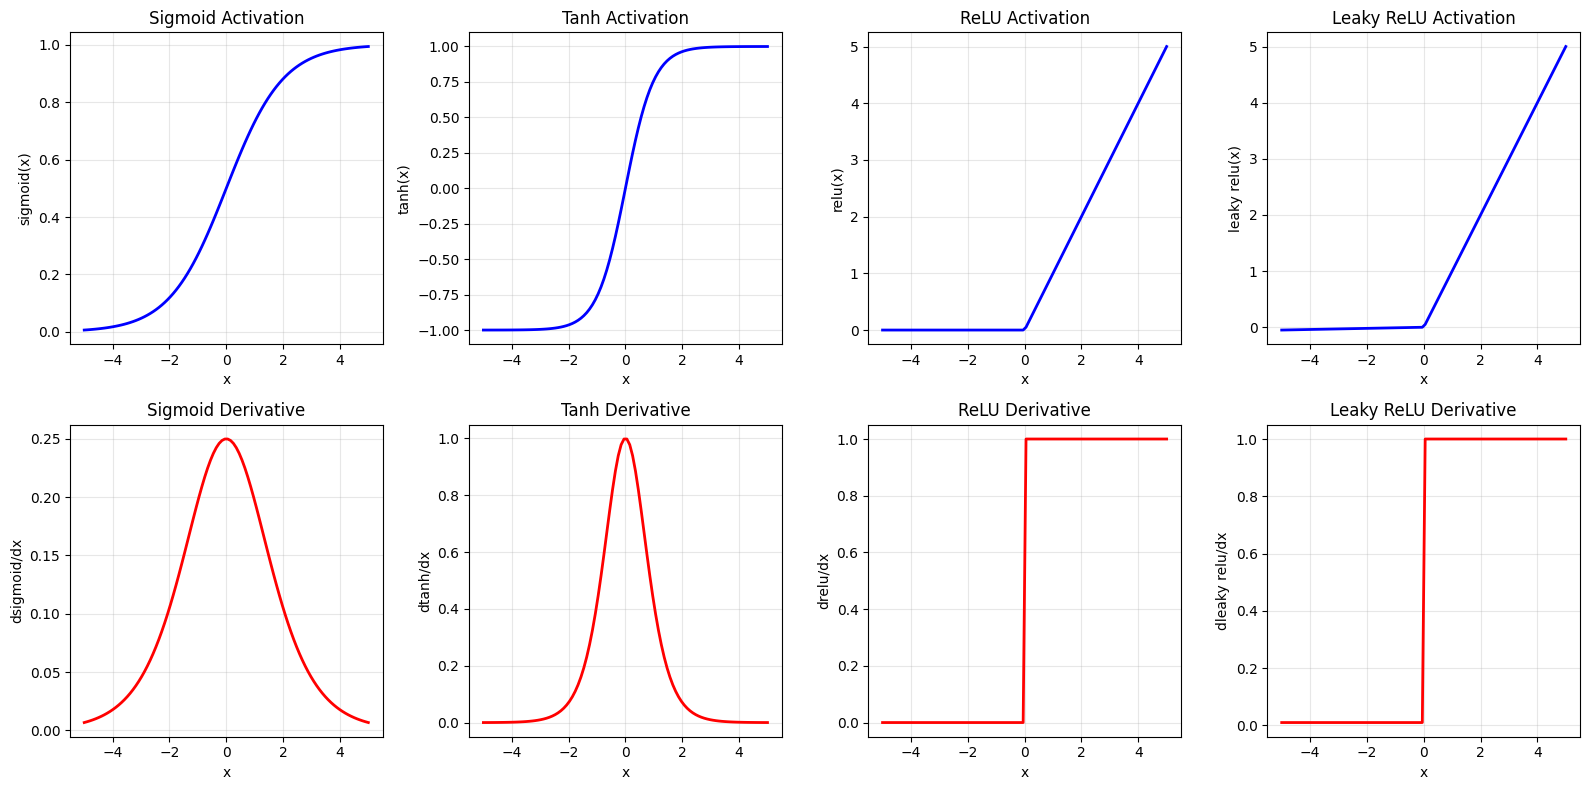

In [72]:

## Part 1: Understanding Activation Functions

### Task 1.1: Implement Different Activation Functions
# TODO: Implement the following activation functions and their derivatives

def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    Implement the sigmoid activation function
    Args:
        x: Input array
    Returns:
        Sigmoid of x
    """
    sigm = 1/(1+np.exp(-x))
    return sigm

def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    """
    Implement the derivative of sigmoid function
    Args:
        x: Input array (pre-activation)
    Returns:
        Derivative of sigmoid
    """
    return sigmoid(x)*(1-sigmoid(x))


def tanh(x: np.ndarray) -> np.ndarray:
    """
    Implement the tanh activation function
    Args:
        x: Input array
    Returns:
        Tanh of x
    """
    th = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return th

def tanh_derivative(x):
    """
    Implement the derivative of tanh function
    Args:
        x: Input array (pre-activation)
    Returns:
        Derivative of tanh
    """
    thd = np.square(2/(np.exp(x)+np.exp(-x)))
    return thd

def relu(x: np.ndarray) -> np.ndarray:
    """
    Implement the ReLU activation function
    Args:
        x: Input array
    Returns:
        ReLU of x
    """
    return np.maximum(x,0)

def relu_derivative(x: np.ndarray) -> np.ndarray:
    """
    Implement the derivative of ReLU function
    Args:
        x: Input array (pre-activation)
    Returns:
        Derivative of ReLU
    """
    drelu = (x>0).astype(float)
    # print(drelu)
    return drelu

def leaky_relu(x: np.ndarray, alpha: float = 0.01) -> np.ndarray:
    """
    Implement the Leaky ReLU activation function
    Args:
        x: Input array
        alpha: Slope for negative values
    Returns:
        Leaky ReLU of x
    """
    lrelu = (x>0)*x + (x<=0)*alpha*x
    return lrelu

def leaky_relu_derivative(x: np.ndarray, alpha: float = 0.01) -> np.ndarray:
    """
    Implement the derivative of Leaky ReLU function
    Args:
        x: Input array (pre-activation)
        alpha: Slope for negative values
    Returns:
        Derivative of Leaky ReLU
    """
    dlrelu = (x>0).astype(float) + (x<=0)*alpha
    return dlrelu

### Visualization of Activation Functions
def plot_activation_functions():
    """
    Plot different activation functions and their derivatives
    """
    x = np.linspace(-5, 5, 100)

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    # Activation functions
    functions = [
        ('Sigmoid', sigmoid, sigmoid_derivative),
        ('Tanh', tanh, tanh_derivative),
        ('ReLU', relu, relu_derivative),
        ('Leaky ReLU', leaky_relu, leaky_relu_derivative)
    ]

    for i, (name, func, deriv) in enumerate(functions):
        # Plot activation function
        y = func(x)
        axes[0, i].plot(x, y, 'b-', linewidth=2, label=name)
        axes[0, i].set_title(f'{name} Activation')
        axes[0, i].grid(True, alpha=0.3)
        axes[0, i].set_xlabel('x')
        axes[0, i].set_ylabel(f'{name.lower()}(x)')

        # Plot derivative
        dy = deriv(x)
        axes[1, i].plot(x, dy, 'r-', linewidth=2, label=f"{name} derivative")
        axes[1, i].set_title(f'{name} Derivative')
        axes[1, i].grid(True, alpha=0.3)
        axes[1, i].set_xlabel('x')
        axes[1, i].set_ylabel(f"d{name.lower()}/dx")

    plt.tight_layout()
    plt.show()

# Run the visualization
plot_activation_functions()


In [73]:

## Part 2: Neural Network Implementation

### Task 2.1: Implement the Neural Network Class

class FullyConnectedNN:
    """
    A fully connected neural network implementation
    """

    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01):
        """
        Initialize the neural network
        Args:
            layer_sizes: List of integers representing the size of each layer
            activation: Activation function ('sigmoid', 'tanh', 'relu', 'leaky_relu')
            learning_rate: Learning rate for gradient descent
        """
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.activation_name = activation

        # Set activation functions
        self.activation_functions = {
            'sigmoid': (sigmoid, sigmoid_derivative),
            'tanh': (tanh, tanh_derivative),
            'relu': (relu, relu_derivative),
            'leaky_relu': (leaky_relu, leaky_relu_derivative)
        }

        self.activation, self.activation_derivative = self.activation_functions[activation]

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        # Initialize weights and biases for each layer
        # Use Xavier/Glorot initialization for weights
        for i in range(len(layer_sizes) - 1):
            # Initialize weights with Xavier initialization
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            self.weights.append(w)

            # Initialize biases to zero
            b = np.zeros((1, layer_sizes[i+1]))
            self.biases.append(b)

        # Store activations and z values for backpropagation
        self.activations = []
        self.z_values = []

    def forward_propagation(self, X):
        """
        Perform forward propagation
        Args:
            X: Input data of shape (m, n_features)
        Returns:
            Output of the network
        """
        # TODO: Implement forward propagation

        self.activations = [X]
        self.z_values = []

        current_activation = X

        for i in range(len(self.weights)):
            # Linear transformation
            # print('a and weights and biases')
            # print(current_activation.shape)
            # print(self.weights[i].shape)
            # print(self.biases[i].shape)



            self.z_values.append(np.matmul(current_activation,self.weights[i]) + self.biases[i])

            # Apply activation function (except for the last layer - use sigmoid for binary classification)
            if i == len(self.weights) - 1:
                # Output layer - use sigmoid for binary classification
                current_activation = sigmoid(self.z_values[i])
            else:
                # Hidden layers - use specified activation function
                current_activation = self.activation(self.z_values[i])
            self.activations.append(current_activation)
        # print(len(self.activations))
        # print(len(self.z_values))
        # print('124315trew')
        return current_activation

    def backward_propagation(self, X, y):
        """
        Perform backward propagation
        Args:
            X: Input data of shape (m, n_features)
            y: True labels of shape (m, 1)
        Returns:
            Gradients for weights and biases
        """
        # TODO: Implement backward propagation using the chain rule
        m = X.shape[0]
        # Initialize gradient storage
        dW = []
        db = []

        # Output layer error (assuming binary cross-entropy loss)
        dz = self.activations[-1] - y
        # print(len(self.activations))
        # print(self.activations[-1].shape)
        # print(y.shape)
        # print('aaa')


        # Backpropagate through each layer
        for i in reversed(range(len(self.weights))):
            # Calculate gradients
            # print(dz.shape)
            # print(self.activations[i].shape)
            dW_temp = (1/m)*np.matmul(self.activations[i].T,dz)
            db_temp = (1/m)*np.sum(dz, axis=0, keepdims=True)
            # dW = [dW_temp] + dW
            # db = [db_temp] + db
            dW.append(dW_temp)
            db.append(db_temp)

            # print(i)
            # print('self.activations[i]')
            # print(self.activations[i].shape)
            # print('dz')
            # print(dz.shape)
            # print('self.weights[i]')
            # print(self.weights[i].shape)
            # print('self.z_values[i]')
            # print(self.z_values[i].shape)
            # print('---------------')


            # Calculate error for previous layer (if not input layer)
            if i > 0:
                if i == len(self.weights) - 1:
                    # Coming from output layer (sigmoid)
                    dz = np.matmul(dz,self.weights[i].T) * sigmoid_derivative(self.z_values[i-1])  # CAUTION: i-1, because z vector does not include the input vector

                else:
                    # Coming from hidden layer
                    dz = np.matmul(dz,self.weights[i].T) * self.activation_derivative(self.z_values[i-1])



            # print('dW')
            # print(dW)


        dW = list(reversed(dW))
        db = list(reversed(db))


        return dW, db

    def update_parameters(self, dW, db):
        """
        Update weights and biases using gradients
        Args:
            dW: List of weight gradients
            db: List of bias gradients
        """
        # TODO: Update weights and biases using gradient descent
        step_size = 2e-2
        for i in range(len(self.weights)):
            # print(self.weights)
            # print(dW)
            # print(i)
            # print(self.weights[i].shape)
            # print(dW[i].shape)
            self.weights[i] = self.weights[i] - step_size*dW[i]
            self.biases[i] = self.biases[i] - step_size*db[i]

    def compute_loss(self, y_true, y_pred):
        """
        Compute binary cross-entropy loss
        Args:
            y_true: True labels
            y_pred: Predicted probabilities
        Returns:
            Loss value
        """
        # TODO: Implement binary cross-entropy loss
        # Clip predictions to prevent log(0)
        y_pred_clip = np.clip(y_pred,1e-10,1-1e-10)
        # Binary cross-entropy loss
        loss = (-1) * np.mean(y_true*np.log(y_pred_clip) + (1-y_true)*np.log(1-y_pred_clip))
        return loss

    def train(self, X, y, epochs=1000, verbose=True):
        """
        Train the neural network
        Args:
            X: Training data
            y: Training labels
            epochs: Number of training epochs
            verbose: Whether to print progress
        Returns:
            List of losses during training
        """
        # TODO: Implement the training loop



        losses = []

        for epoch in range(epochs):
            # Forward propagation
            # print('Debug: epoch')
            # print(epoch)

            y_pred = self.forward_propagation(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)

            # Backward propagation
            dW, db = self.backward_propagation(X, y)

            # Update parameters
            self.update_parameters(dW, db)

            # Print progress
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return losses

    def predict(self, X):
        """
        Make predictions
        Args:
            X: Input data
        Returns:
            Predictions
        """
        return self.forward_propagation(X)

    def predict_classes(self, X):
        """
        Make class predictions
        Args:
            X: Input data
        Returns:
            Class predictions (0 or 1)
        """
        return (self.predict(X) > 0.5).astype(int)



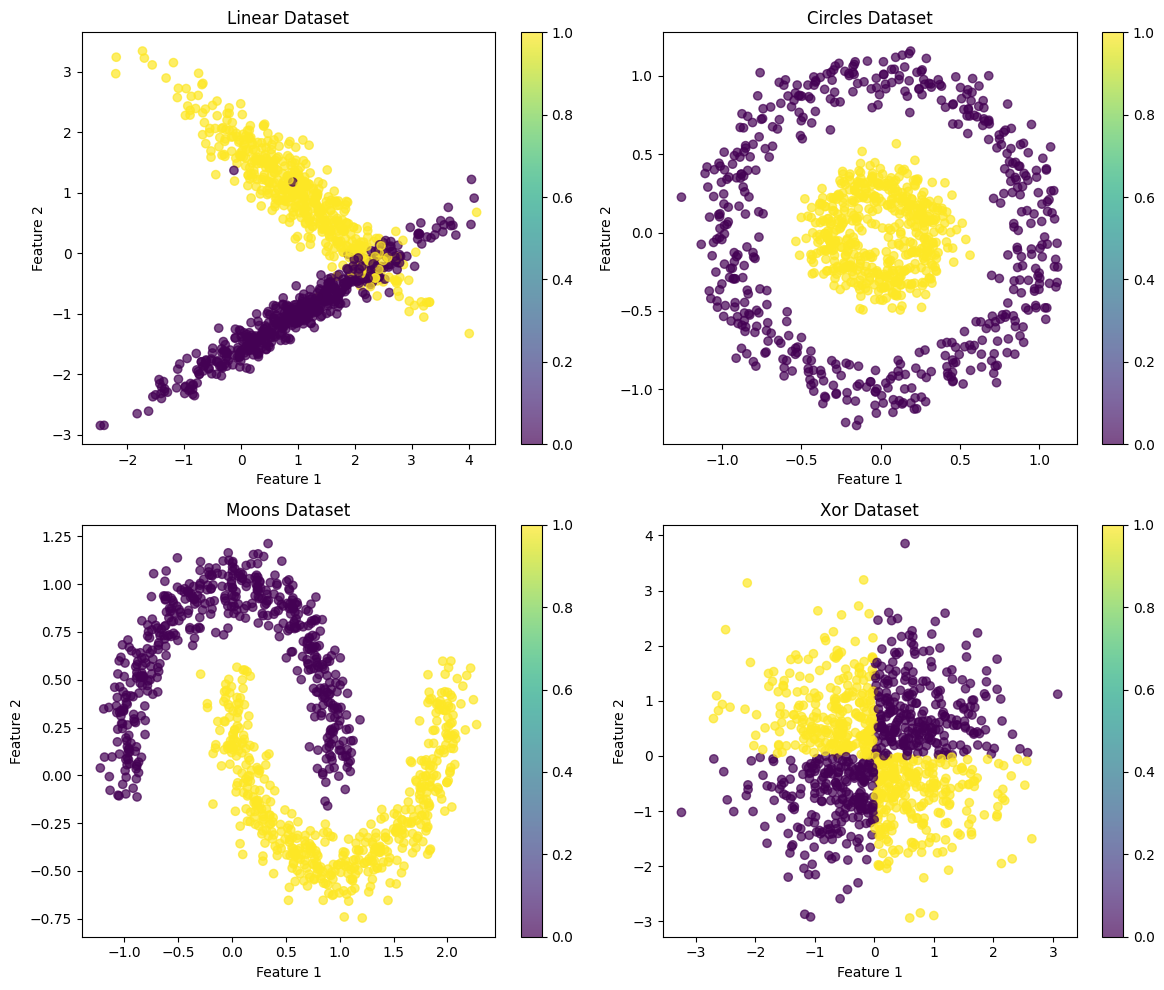

In [74]:
## Part 3: Data Generation and Preprocessing

### Task 3.1: Generate Different Types of Datasets

def generate_datasets():
    """
    Generate different types of datasets for testing
    """
    datasets = {}

    # Linear separable data
    X_linear, y_linear = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                           n_informative=2, n_clusters_per_class=1,
                                           random_state=42)
    datasets['linear'] = (X_linear, y_linear.reshape(-1, 1))

    # Circular data
    X_circles, y_circles = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=42)
    datasets['circles'] = (X_circles, y_circles.reshape(-1, 1))

    # Moon-shaped data
    X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)
    datasets['moons'] = (X_moons, y_moons.reshape(-1, 1))

    # XOR-like data
    np.random.seed(42)
    X_xor = np.random.randn(1000, 2)
    y_xor = ((X_xor[:, 0] > 0) ^ (X_xor[:, 1] > 0)).astype(int)
    datasets['xor'] = (X_xor, y_xor.reshape(-1, 1))

    return datasets

def plot_datasets(datasets):
    """
    Plot the generated datasets
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    dataset_names = ['linear', 'circles', 'moons', 'xor']

    for i, name in enumerate(dataset_names):
        X, y = datasets[name]
        scatter = axes[i].scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='viridis', alpha=0.7)
        axes[i].set_title(f'{name.capitalize()} Dataset')
        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')
        plt.colorbar(scatter, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Generate and plot datasets
datasets = generate_datasets()
plot_datasets(datasets)



In [75]:
## Part 4: Training and Evaluation

### Task 4.1: Train Networks with Different Architectures

def train_and_evaluate_network(X, y, architecture, activation='relu', epochs=1000):
    """
    Train and evaluate a neural network
    Args:
        X: Input features
        y: Labels
        architecture: List of layer sizes
        activation: Activation function name
        epochs: Number of training epochs
    Returns:
        Trained network, training losses, test accuracy
    """

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train network
    network = FullyConnectedNN(architecture, activation=activation, learning_rate=0.01)
    losses = network.train(X_train_scaled, y_train, epochs=epochs, verbose=False)

    # Evaluate on test set
    y_pred = network.predict_classes(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)

    return network, losses, accuracy, scaler

### Task 4.2: Compare Different Architectures and Activations

def compare_architectures_and_activations():
    """
    Compare different network architectures and activation functions
    """
    # Test on circles dataset (non-linearly separable)
    X, y = datasets['circles']

    architectures = [
        [2, 10, 1],      # Single hidden layer
        [2, 10, 10, 1],  # Two hidden layers
        [2, 20, 10, 1],  # Larger first layer
        [2, 50, 25, 1]   # Even larger network
    ]

    activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

    results = {}

    print("Comparing architectures and activation functions on circles dataset:")
    print("-" * 70)

    for arch in architectures:
        arch_name = f"Architecture {arch}"
        results[arch_name] = {}

        for activation in activations:
            network, losses, accuracy, scaler = train_and_evaluate_network(
                X, y, arch, activation, epochs=1000
            )
            results[arch_name][activation] = {
                'accuracy': accuracy,
                'final_loss': losses[-1],
                'network': network,
                'scaler': scaler
            }
            # print(activation.shape)
            # print(losses[-1])
            # print(accuracy)

            print(f"{arch_name}, {activation}: Accuracy = {accuracy:.3f}, Final Loss = {losses[-1]:.4f}")

    return results

# Run the comparison
comparison_results = compare_architectures_and_activations()


Comparing architectures and activation functions on circles dataset:
----------------------------------------------------------------------
Architecture [2, 10, 1], sigmoid: Accuracy = 0.640, Final Loss = 0.6606
Architecture [2, 10, 1], tanh: Accuracy = 0.790, Final Loss = 0.6450
Architecture [2, 10, 1], relu: Accuracy = 0.960, Final Loss = 0.2659
Architecture [2, 10, 1], leaky_relu: Accuracy = 0.995, Final Loss = 0.2123
Architecture [2, 10, 10, 1], sigmoid: Accuracy = 0.485, Final Loss = 0.6901
Architecture [2, 10, 10, 1], tanh: Accuracy = 0.885, Final Loss = 0.5111
Architecture [2, 10, 10, 1], relu: Accuracy = 0.835, Final Loss = 0.3434
Architecture [2, 10, 10, 1], leaky_relu: Accuracy = 0.900, Final Loss = 0.3672
Architecture [2, 20, 10, 1], sigmoid: Accuracy = 0.525, Final Loss = 0.6873
Architecture [2, 20, 10, 1], tanh: Accuracy = 0.845, Final Loss = 0.4640
Architecture [2, 20, 10, 1], relu: Accuracy = 0.995, Final Loss = 0.1460
Architecture [2, 20, 10, 1], leaky_relu: Accuracy = 

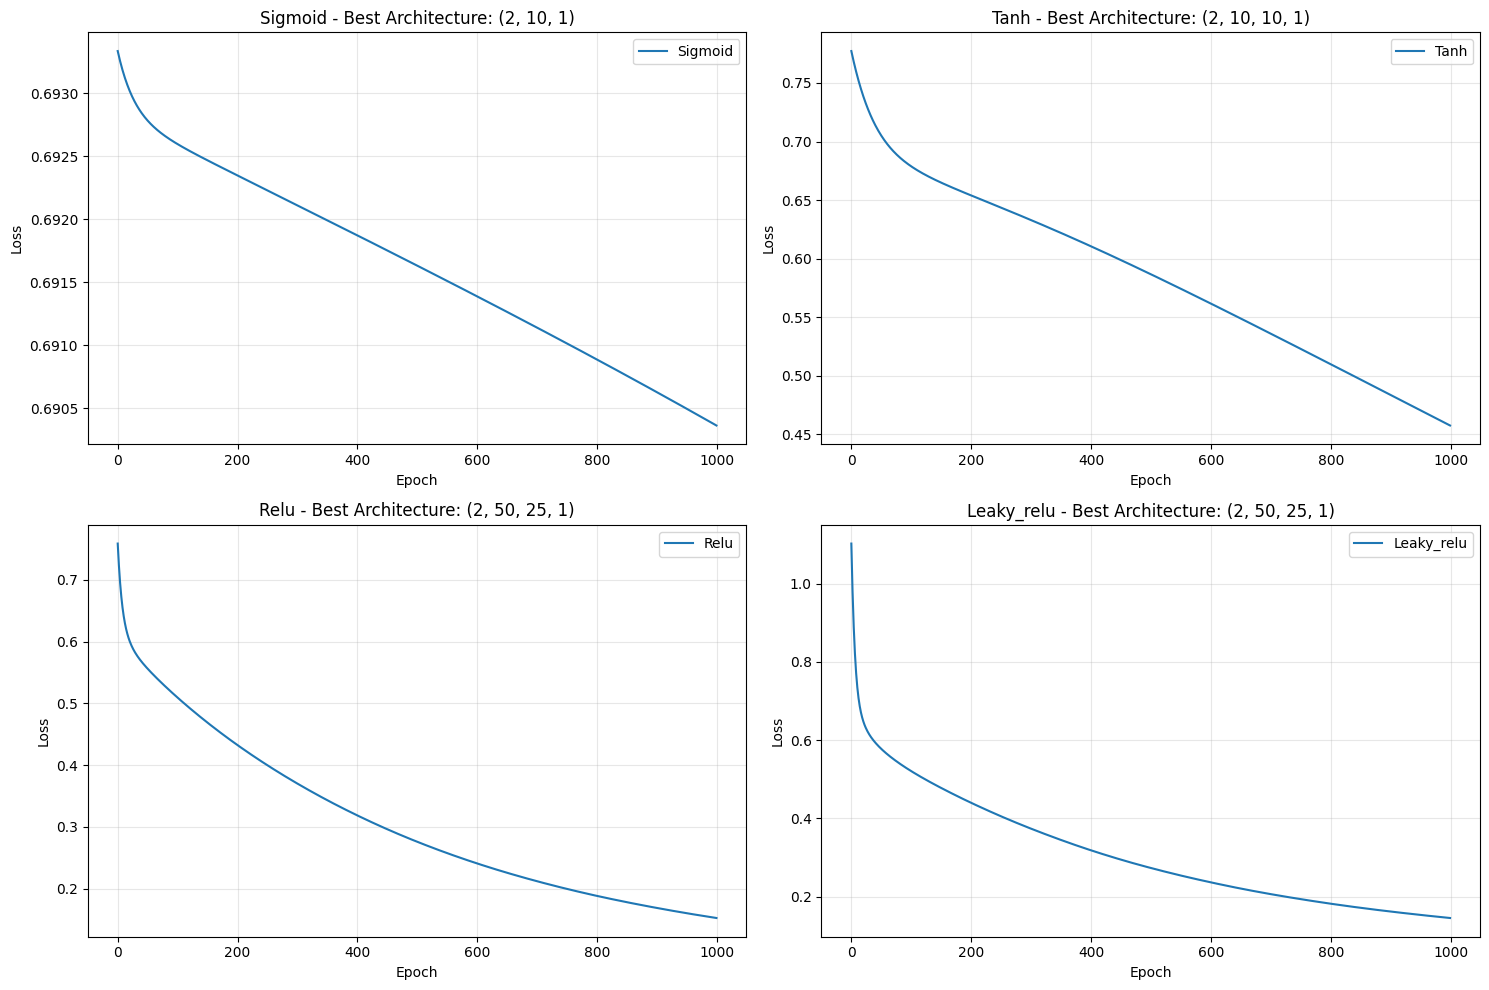

In [76]:

def plot_training_curves(results):
    """
    Plot training curves for different configurations
    """
    # Plot training curves for best performing networks
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

    for i, activation in enumerate(activations):
        # Find best architecture for this activation
        best_arch = None
        best_acc = 0

        for arch_name in results.keys():
            if activation in results[arch_name]:
                acc = results[arch_name][activation]['accuracy']
                if acc > best_acc:
                    best_acc = acc
                    best_arch = arch_name

        if best_arch:
            # Retrain to get loss curve
            X, y = datasets['circles']
            arch_sizes = eval(best_arch.split('[')[1].split(']')[0])
            network, losses, _, _ = train_and_evaluate_network(X, y, arch_sizes, activation, epochs=1000)

            axes[i].plot(losses, label=f'{activation.capitalize()}')
            axes[i].set_title(f'{activation.capitalize()} - Best Architecture: {arch_sizes}')
            axes[i].set_xlabel('Epoch')
            axes[i].set_ylabel('Loss')
            axes[i].grid(True, alpha=0.3)
            axes[i].legend()

    plt.tight_layout()
    plt.show()

# Plot training curves
plot_training_curves(comparison_results)

In [77]:
# Part 6: Result Analysis

# Why does sigmoid activation function result in poor performance in this case?


# Answer:
# The sigmoid function will transfer a zero-mean date to a new data vector which has a mean of 0.5,
# and the sigmoid function next layer will further push the mean to the positive far end, which could
# finally reach the unsensitive region of the sigmoid function.





















